In [1]:
# import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Pulling in the data [In text citation: Bowne-Anderson, H. (n.d)]
churned_data_WGU = pd.read_csv("C:/Users/cfman/OneDrive/Desktop/WGUClasses/D210 Reporting and Presentation/churn_clean.csv")
churned_data_Cali = pd.read_csv("C:/Users/cfman/OneDrive/Desktop/WGUClasses/D210 Reporting and Presentation/telecom_customer_churn.csv")

In [3]:
## I'm going to create a new dataframe that has just the information and columns that i will use for my analysis.
## I want to use the same variables I used in D208

churned_data_WGU = churned_data_WGU[['Age', 'Gender', 'Churn', 'Contract', 'PaperlessBilling','Tenure', 
                                     'MonthlyCharge', 'Bandwidth_GB_Year']]
churned_data_Cali = churned_data_Cali[['Zip Code', 'Age', 'Gender', 'Customer Status', 'Contract', 'Paperless Billing', 
                                       'Tenure in Months', 'Monthly Charge', 'Avg Monthly GB Download']]


In [4]:
# Before we get started into the actual cleaning, I want to check for duplicate values in case we need to edit those first
# I am also going to check the shape of the dataframe to verify the rows and columns
# [In text citation: Bowne-Anderson, H. (n.d)]
print(churned_data_WGU.shape)
print(churned_data_Cali.shape)

duplicates_WGU = churned_data_WGU.duplicated(keep = False)
duplicates_WGU.value_counts()

duplicates = churned_data_Cali.duplicated(keep = False)
duplicates.value_counts()

(10000, 8)
(7043, 9)


False    7043
dtype: int64

In [5]:
churned_data_Cali.head()

,Zip Code,Age,Gender,Customer Status,Contract,Paperless Billing,Tenure in Months,Monthly Charge,Avg Monthly GB Download
0,93225,37,Female,Stayed,One Year,Yes,9,65.6,16.0
1,91206,46,Male,Stayed,Month-to-Month,No,9,-4.0,10.0
2,92627,50,Male,Churned,Month-to-Month,Yes,4,73.9,30.0
3,94553,78,Male,Churned,Month-to-Month,Yes,13,98.0,4.0
4,93010,75,Female,Churned,Month-to-Month,Yes,3,83.9,11.0


In [6]:
churned_data_WGU.head()

,Age,Gender,Churn,Contract,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,68,Male,No,One year,Yes,6.795513,172.455519,904.536110
1,27,Female,Yes,Month-to-month,Yes,1.156681,242.632554,800.982766
2,50,Female,No,Two Year,Yes,15.754144,159.947583,2054.706961
3,48,Male,No,Two Year,Yes,17.087227,119.956840,2164.579412
4,83,Male,Yes,Month-to-month,No,1.670972,149.948316,271.493436


In [7]:
## Setting all column names to the same thing for ease of access later
churned_data_Cali.rename(columns = {'Customer Status' : 'Churn', 'Paperless Billing' : 'PaperlessBilling', 
                                   'Tenure in Months' : 'Tenure', 'Monthly Charge': 'MonthlyCharge', 
                                    'Avg Monthly GB Download' : 'Bandwidth_GB_Month'}, inplace = True)
churned_data_Cali.head()

,Zip Code,Age,Gender,Churn,Contract,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Month
0,93225,37,Female,Stayed,One Year,Yes,9,65.6,16.0
1,91206,46,Male,Stayed,Month-to-Month,No,9,-4.0,10.0
2,92627,50,Male,Churned,Month-to-Month,Yes,4,73.9,30.0
3,94553,78,Male,Churned,Month-to-Month,Yes,13,98.0,4.0
4,93010,75,Female,Churned,Month-to-Month,Yes,3,83.9,11.0


In [8]:
churned_data_Cali['Churn'].unique()

array(['Stayed', 'Churned', 'Joined'], dtype=object)

In [9]:
churned_data_Cali['Churn'] = churned_data_Cali['Churn'].replace({'Stayed': 'No', 'Churned': 'Yes', 'Joined' : 'No'})
churned_data_Cali.head()

,Zip Code,Age,Gender,Churn,Contract,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Month
0,93225,37,Female,No,One Year,Yes,9,65.6,16.0
1,91206,46,Male,No,Month-to-Month,No,9,-4.0,10.0
2,92627,50,Male,Yes,Month-to-Month,Yes,4,73.9,30.0
3,94553,78,Male,Yes,Month-to-Month,Yes,13,98.0,4.0
4,93010,75,Female,Yes,Month-to-Month,Yes,3,83.9,11.0


In [10]:
churned_data_Cali['Contract'].unique()

array(['One Year', 'Month-to-Month', 'Two Year'], dtype=object)

In [11]:
churned_data_WGU['Contract'].unique()

array(['One year', 'Month-to-month', 'Two Year'], dtype=object)

In [12]:
churned_data_WGU['Contract'] = churned_data_WGU['Contract'].replace({'Month-to-month' : 'Month-to-Month'})
churned_data_WGU['Contract'].unique()

array(['One year', 'Month-to-Month', 'Two Year'], dtype=object)

In [13]:
churned_data_WGU['Tenure'] = round(churned_data_WGU['Tenure'], 0)
churned_data_WGU['Tenure'] = churned_data_WGU['Tenure'].astype(int)

churned_data_WGU['MonthlyCharge'] = round(churned_data_WGU['MonthlyCharge'], 1)

churned_data_WGU['Bandwidth_GB_Year'] = round((churned_data_WGU['Bandwidth_GB_Year'] / 12))
churned_data_WGU.rename(columns = {'Bandwidth_GB_Year' : 'Bandwidth_GB_Month'}, inplace = True)

churned_data_WGU.head()

,Age,Gender,Churn,Contract,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Month
0,68,Male,No,One year,Yes,7,172.5,75.0
1,27,Female,Yes,Month-to-Month,Yes,1,242.6,67.0
2,50,Female,No,Two Year,Yes,16,159.9,171.0
3,48,Male,No,Two Year,Yes,17,120.0,180.0
4,83,Male,Yes,Month-to-Month,No,2,149.9,23.0


In [14]:
churned_data_WGU.head()

,Age,Gender,Churn,Contract,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Month
0,68,Male,No,One year,Yes,7,172.5,75.0
1,27,Female,Yes,Month-to-Month,Yes,1,242.6,67.0
2,50,Female,No,Two Year,Yes,16,159.9,171.0
3,48,Male,No,Two Year,Yes,17,120.0,180.0
4,83,Male,Yes,Month-to-Month,No,2,149.9,23.0


In [15]:
churned_data_Cali.head()

,Zip Code,Age,Gender,Churn,Contract,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Month
0,93225,37,Female,No,One Year,Yes,9,65.6,16.0
1,91206,46,Male,No,Month-to-Month,No,9,-4.0,10.0
2,92627,50,Male,Yes,Month-to-Month,Yes,4,73.9,30.0
3,94553,78,Male,Yes,Month-to-Month,Yes,13,98.0,4.0
4,93010,75,Female,Yes,Month-to-Month,Yes,3,83.9,11.0


In [16]:
# I want to check which have missing values here
# [In text citation: Bowne-Anderson, H. (n.d)]
#churned_data_WGU.isna().sum()
churned_data_Cali.isna().sum()
#churned_data_WGU.isnull().sum()

Zip Code                 0
Age                      0
Gender                   0
Churn                    0
Contract                 0
PaperlessBilling         0
Tenure                   0
MonthlyCharge            0
Bandwidth_GB_Month    1526
dtype: int64

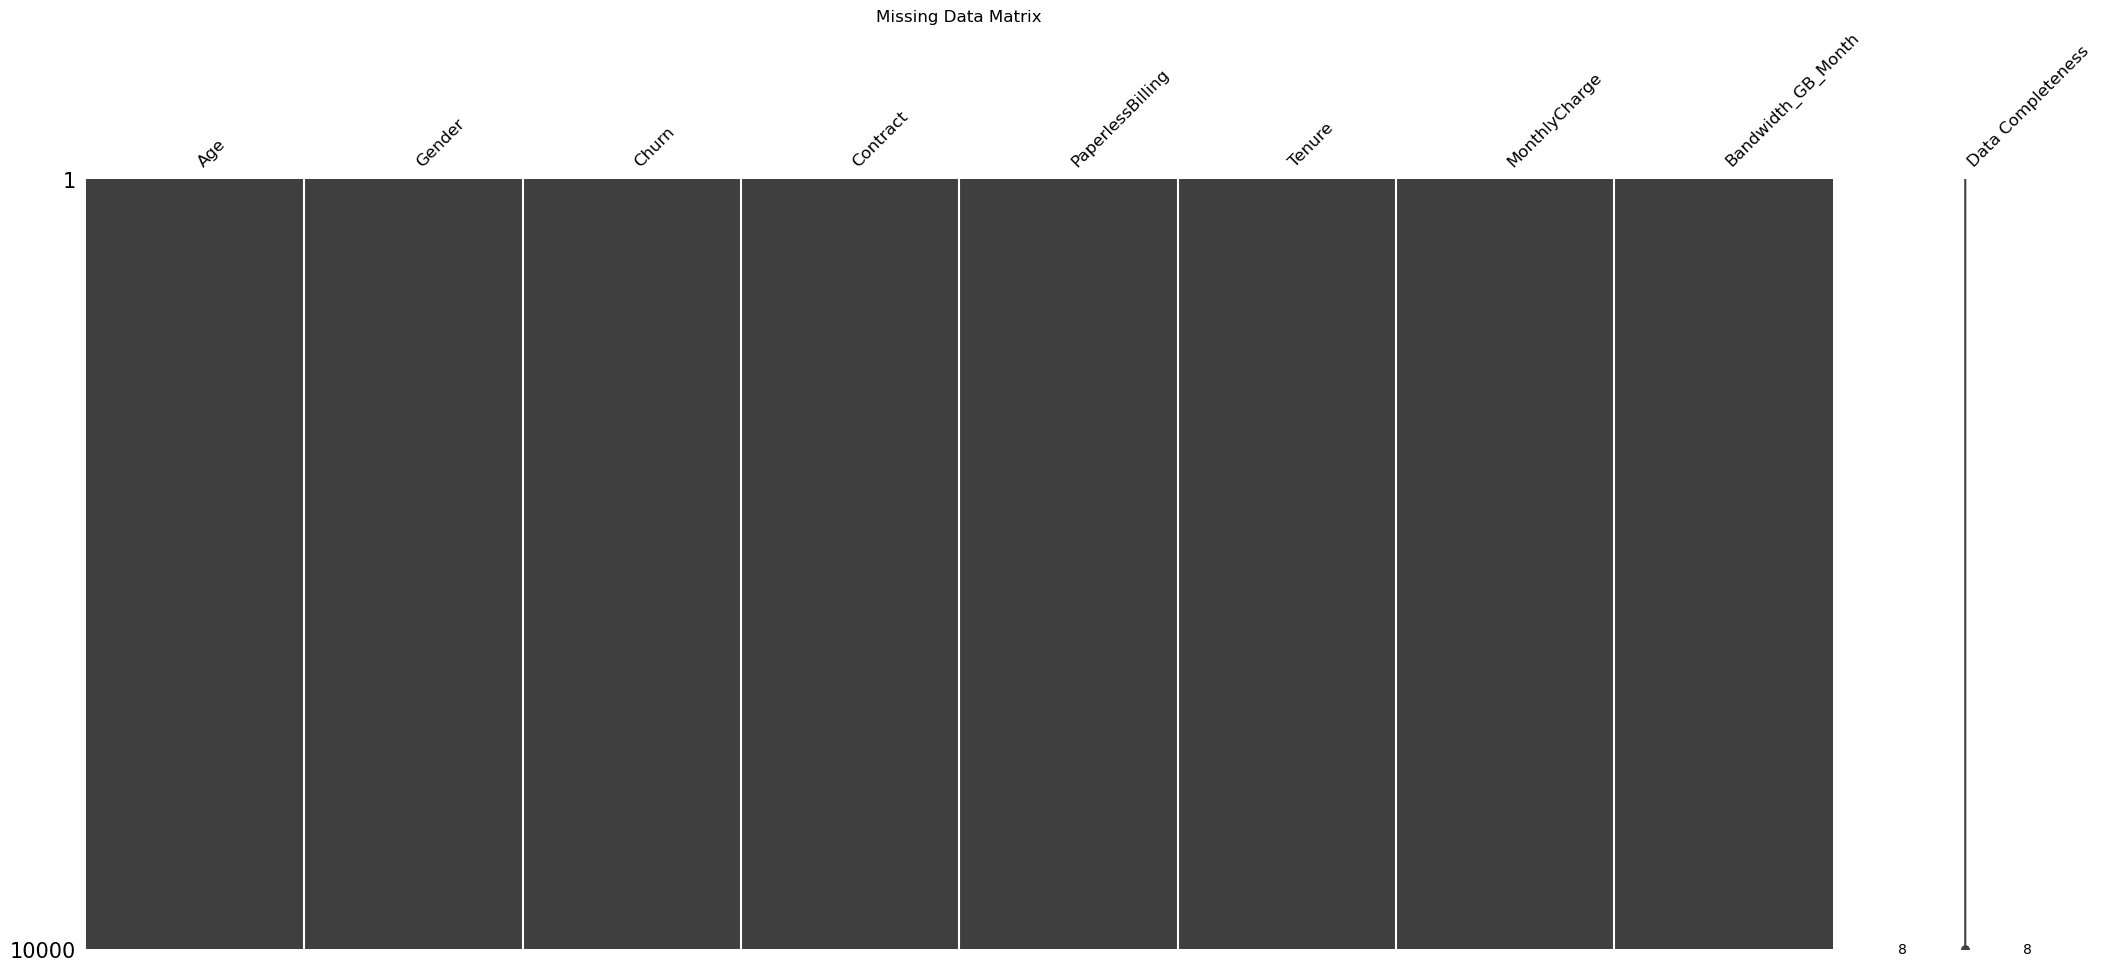

In [17]:
# Visualizing the missing data 
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Cleaning Essentials]
msno.matrix(churned_data_WGU, fontsize = 12, labels = True)
plt.title("Missing Data Matrix")
#plt.xlabel(col_names)
plt.show()

In [18]:
## Checking all the quantitative variables for outliers to decide if I need to edit them.

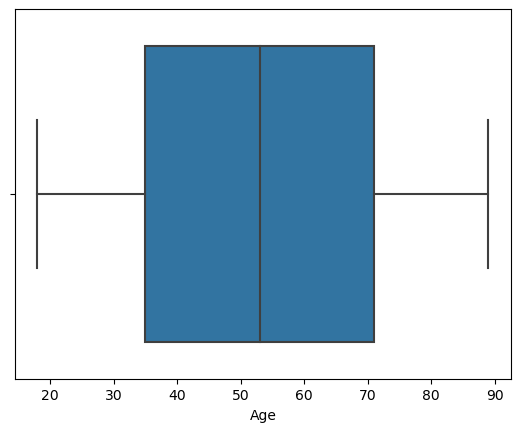

In [19]:
boxplot_Age = seaborn.boxplot(x = "Age", data = churned_data_WGU)

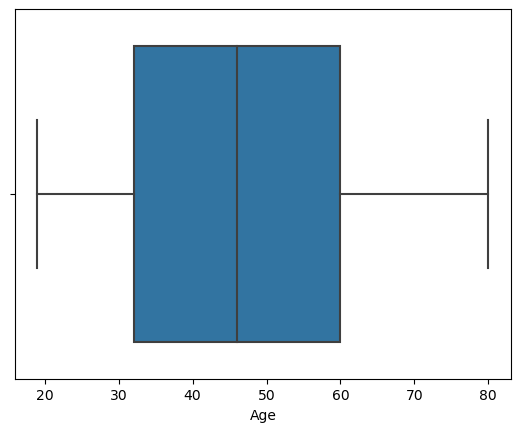

In [20]:
boxplot_Age = seaborn.boxplot(x = "Age", data = churned_data_Cali)

In [21]:
## No outliers detected for Age

In [22]:
## No more outliers detected for Yearly_equip_failure

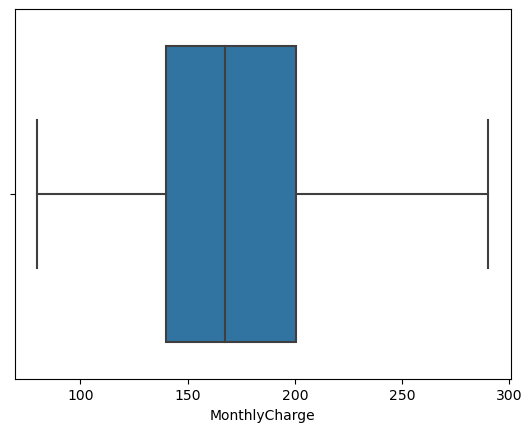

In [23]:
boxplot_MonthlyCharge = seaborn.boxplot(x = "MonthlyCharge", data = churned_data_WGU)

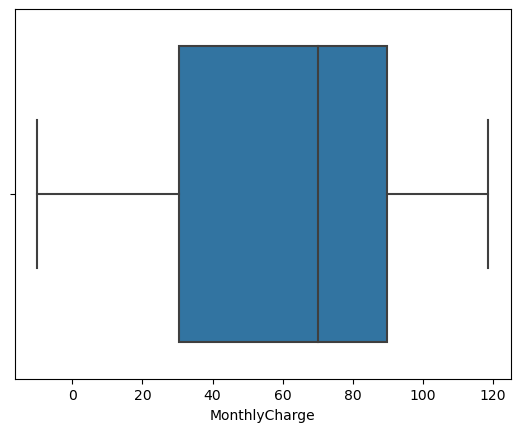

In [24]:
boxplot_MonthlyCharge = seaborn.boxplot(x = "MonthlyCharge", data = churned_data_Cali)

In [25]:
## No outliers detected for MonthlyCharge

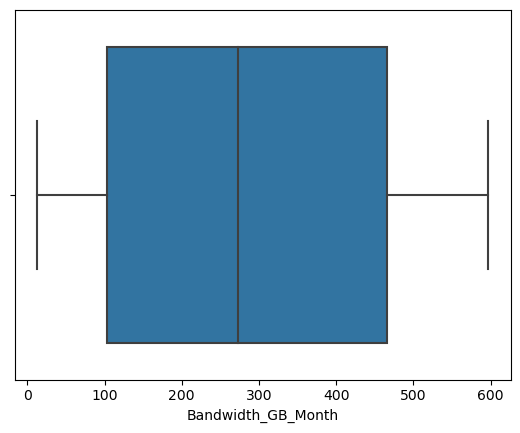

In [26]:
boxplot_Bandwidth_GB_Month = seaborn.boxplot(x = "Bandwidth_GB_Month", data = churned_data_WGU)

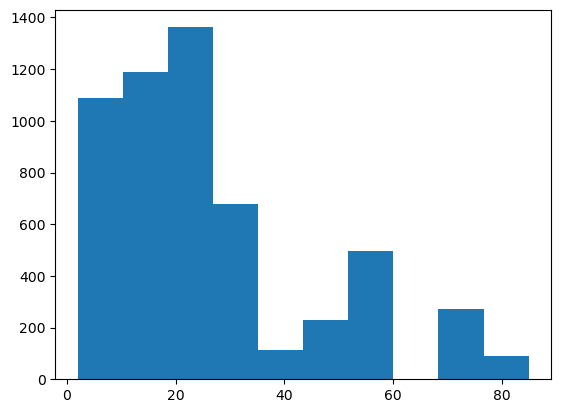

In [27]:
plt.hist(churned_data_Cali['Bandwidth_GB_Month'])
plt.show()

In [28]:
churned_data_Cali["Bandwidth_GB_Month"].fillna(churned_data_Cali["Bandwidth_GB_Month"].median(), inplace = True)

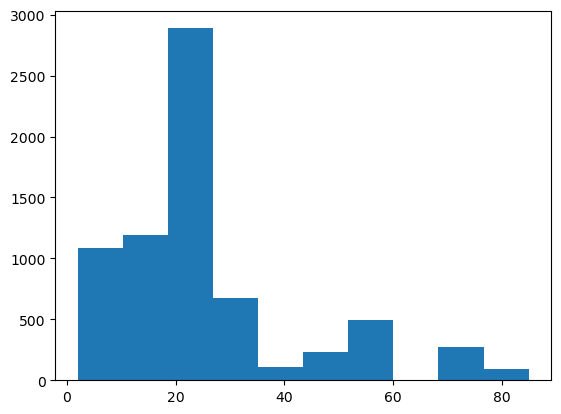

In [29]:
plt.hist(churned_data_Cali['Bandwidth_GB_Month'])
plt.show()

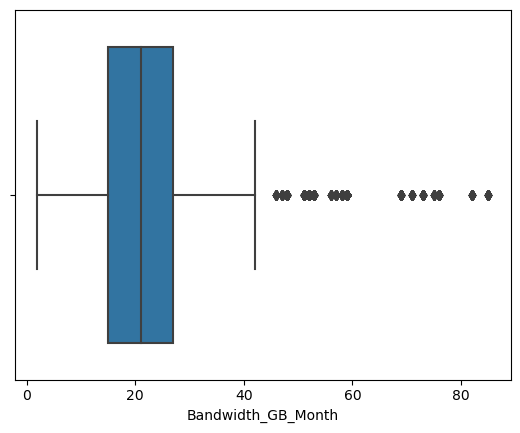

In [30]:
boxplot_Bandwidth_GB_Month = seaborn.boxplot(x = "Bandwidth_GB_Month", data = churned_data_Cali)

In [31]:
churned_data_Cali['Bandwidth_GB_Month'].describe()

count    7043.000000
mean       25.065455
std        17.466342
min         2.000000
25%        15.000000
50%        21.000000
75%        27.000000
max        85.000000
Name: Bandwidth_GB_Month, dtype: float64

In [32]:
churned_data_Cali.drop(churned_data_Cali[ (churned_data_Cali['Bandwidth_GB_Month'] > 27)].index, inplace = True )

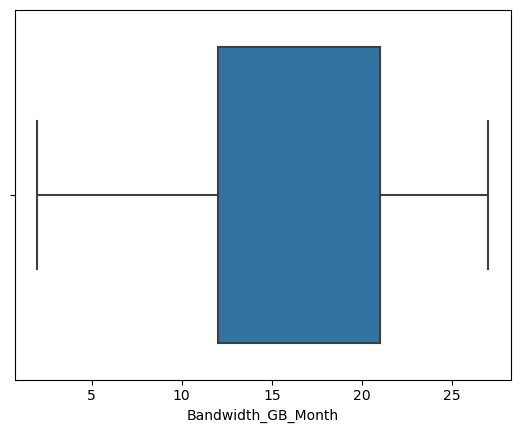

In [33]:
boxplot_Bandwidth_GB_Month = seaborn.boxplot(x = "Bandwidth_GB_Month", data = churned_data_Cali)

In [34]:
churned_data_Cali['Bandwidth_GB_Month'].describe()

count    5363.000000
mean       17.104419
std         6.735637
min         2.000000
25%        12.000000
50%        21.000000
75%        21.000000
max        27.000000
Name: Bandwidth_GB_Month, dtype: float64

In [35]:
churned_data_Cali.drop(churned_data_Cali[ (churned_data_Cali['MonthlyCharge'] < 0)].index, inplace = True )
churned_data_WGU.drop(churned_data_WGU[ (churned_data_WGU['Gender'] == 'Nonbinary')].index, inplace = True )

In [36]:
churned_data_WGU.to_csv('C:/Users/cfman/OneDrive/Desktop/WGUClasses/D210 Reporting and Presentation/churn_data_WGU.csv')
churned_data_Cali.to_csv('C:/Users/cfman/OneDrive/Desktop/WGUClasses/D210 Reporting and Presentation/churn_data_Cali.csv')

In [37]:
churned_data_WGU.shape

(9769, 8)

In [38]:
print(type(churned_data_Cali["Zip Code"][3]))

<class 'numpy.int64'>


In [39]:
print(type(3))

<class 'int'>
